In [42]:
# !pip3 install hydroeval

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [44]:
df = pd.read_excel("SWC_Simulated_Vs_Observed.xlsx").drop(index=0)
df.head()

,Date,Time,SWC_Simulated,SWC_Observed
1,2012-01-01 00:00:00,00:00:00,314.994699,37.59367
2,2012-01-01 01:00:00,01:00:00,314.99153,37.590812
3,2012-01-01 02:00:00,02:00:00,314.98772,37.563503
4,2012-01-01 03:00:00,03:00:00,314.985428,37.556927
5,2012-01-01 04:00:00,04:00:00,314.982098,37.555765


In [45]:
df.tail()

,Date,Time,SWC_Simulated,SWC_Observed
8780,2012-12-31 19:00:00,1900-12-30 19:00:00,313.903572,42.984704
8781,2012-12-31 20:00:00,1900-12-30 20:00:00,313.884497,42.9411
8782,2012-12-31 21:00:00,1900-12-30 21:00:00,314.071221,43.03982
8783,2012-12-31 22:00:00,1900-12-30 22:00:00,314.661644,43.48528
8784,2012-12-31 23:00:00,1900-12-30 23:00:00,315,44.160272


In [46]:
numeric_columns = ['SWC_Simulated', 'SWC_Observed']
df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_53417/487983265.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [47]:
df.isna().sum()

Date             0
Time             0
SWC_Simulated    0
SWC_Observed     0
dtype: int64

In [48]:
simulations = df['SWC_Simulated'].to_list()
observations = df['SWC_Observed'].to_list()

In [49]:
import hydroeval as he

nse = he.evaluator(he.nse, simulations, observations)
print("NSE = ", nse)

rmse = he.evaluator(he.rmse, simulations, observations)
print("RMSE = ", rmse)

kge, r, alpha, beta = he.evaluator(he.kge, simulations, observations)

NSE =  [-337.2027651]
RMSE =  [262.25579111]


In [39]:
kge, r, alpha, beta

(array([-8.77426927]),
 array([0.33562532]),
 array([2.58480183]),
 array([10.62202417]))

In [33]:
max_val = max([max(observations), max(simulations)])
x_coords = [0, max_val]
y_coords = [0, max_val]

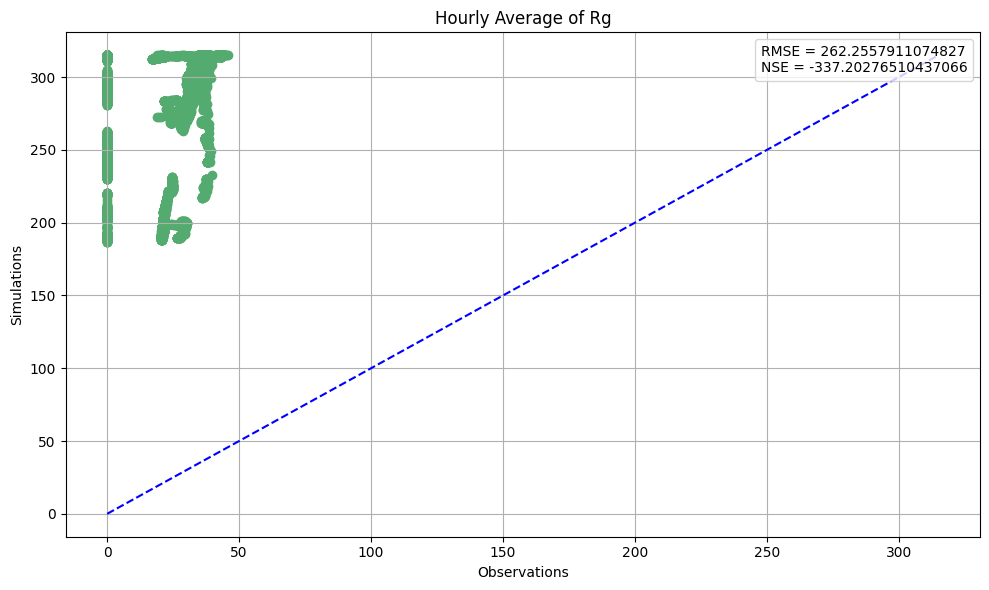

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, color='blue', linestyle='--')
plt.scatter(observations, simulations, color='#54ab6f') # bar, scatter
plt.title('Hourly Average of Rg')  # Add a title
plt.xlabel('Observations')  # Add X-axis label
plt.ylabel('Simulations')  # Add Y-axis label
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels

# Custom legend elements with no line (invisible line)
legend_line1 = Line2D([], [], color='none', marker='None', markersize=0)
legend_line2 = Line2D([], [], color='none', marker='None', markersize=0)

# Creating custom legend labels with no lines
custom_legend = [legend_line1, legend_line2]
legend_labels = [f'RMSE = {rmse[0]}\nNSE = {nse[0]}']

# Adding the custom legend to the plot
plt.legend(custom_legend, legend_labels, loc='upper right', handlelength=0, handletextpad=0, fancybox=True)
plt.show()